In [2]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import os
import scipy.ndimage.morphology
from skimage.measure import label, regionprops
from skimage import feature
from skimage import color
from skimage import filters

# Load images

In [5]:
file_paths = os.listdir('../data/images/')
imgs = [skimage.io.imread('../data/images/' + path) for path in file_paths]

# Segmentation

# Segment all

In [3]:
def get_segmentation(img):
    orig_img = img.copy()
    img = img.mean(2)
    img = img > threshold_otsu(img)
    img = img == False
    scipy.ndimage.morphology.binary_fill_holes(img)
    labels = label(img)
    center = tuple(np.array(img.shape) // 2)
    center_patch = labels == labels[center[0], center[1]]
    scipy.ndimage.morphology.binary_fill_holes(center_patch)
    removed = orig_img
    removed[scipy.ndimage.morphology.binary_fill_holes(center_patch) == False] = 0
    return removed

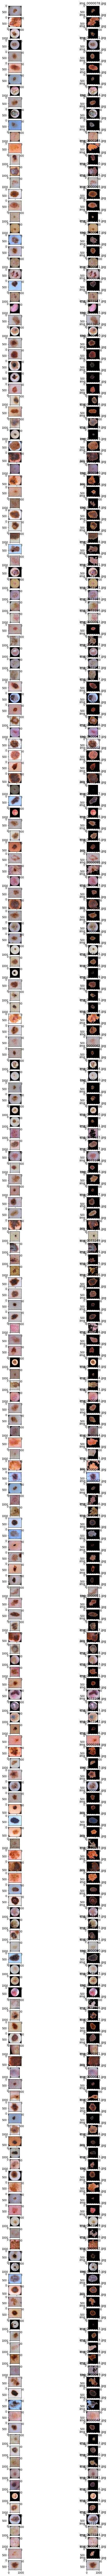

In [10]:
plt.figure(figsize=(10,200))
i = 0
nb_img = 244
for img, path in zip(imgs[:nb_img], file_paths[:nb_img]):
    plt.subplot(nb_img,2,2*i + 1)
    plt.imshow(img)
    removed = get_segmentation(img.copy())
    plt.subplot(nb_img,2,2*i + 2)
    plt.title(path)
    plt.imshow(removed)
    i+=1

# Feature extraction

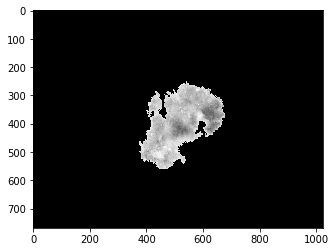

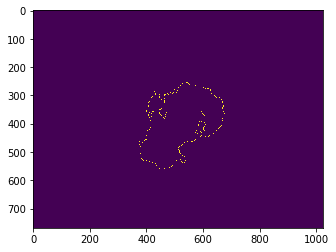

In [6]:
im = color.rgb2gray(get_segmentation(imgs[0]))
plt.figure()
plt.imshow(im, cmap='gray')
edges = feature.canny(im, sigma=3)
plt.figure()
plt.imshow(edges)

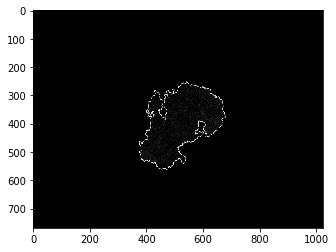

In [8]:
edges = filters.sobel(im)
plt.imshow(edges, cmap='gray')